# TAREA CRISTINA IÑIGUEZ CARRERAS

## Preparación del ambiente de computación

Para poder ejecutar los análisis de este cuaderno es necesario:

1. Instalar BLAST.
2. Descomprimir el archivo taxdb.btd.gz

Para hacerlo de forma automática desde R, disponemos en esta carpeta del pequeño *script* de BASH: `preparar_ambiente.sh`. Esta vez, sólo hace falta ejecutar el bloque siguiente, sin necesidad de salir del cuaderno:

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

## Introducción
El objetivo de este análisis es explorar la distribución taxonómica de las secuencias homólogas a la del receptor muscarínico de acetilcolina humano (CHRM1). Se trata de una proteína que participa en neuroreceptores de acetilcolina y apareció en la evolución temprana de los animales.


Los receptores muscarínicos, junto a los nicotínicos, forman los dos tipos principales de receptores de acetilcolina en las neuronas de vertebrados. Puesto que estas proteínas aparecieron en el linaje del último ancestro común entre cordados y cnidarios, no se conocen proteínas homólogas, aunque sí ortólogas, en organismos aneurales.


La alta complejidad de la cognición humana se asocia con la organización sináptica del sistema nervioso central, por tanto, la abundancia de proteínas sinápticas en vertebrados se relaciona con el aumento en la complejidad de la red sináptica.


## Métodos
La base de datos de secuencias en la que buscar homologías es Swissprot, porque es una base de datos de proteínas ya instalada localmente en este ambiente.


El uso de blastp (Altschul *et al.*, 1990) con diferentes umbrales de e-valor, permite determinar a qué ritmo aumenta la distribución taxonómica de las secuencias encontradas a medida que se relaja el grado de similitud exigido. Es decir, se aceptan como resultados del blastp secuencias con un e-valor mayor.


## Resultados

### BLASTP individual
Primero, se ejecuta una única búsqueda con **blastp**, usando un umbral de e-valor de 1.0e-50, que es muy exigente: sólo las secuencias extremadamente parecidas a la original aparecerán en los resultados.

In [2]:
BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

# Con las funciones textConnection() y read.table(), transformamos el resultado del
# comando aterior en un "data frame", una tabla donde cada columna es una variable.
# La opción "col.names" en read.table() sirve para dar nombre a las columnas.
TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))
# Dimensiones de la tabla:
dim(TablaOut01)

[1] 37 11

In [3]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


La tabla de resultados incluye 37 secuencias encontradas, incluyendo la misma secuencia usada como *query*. Puesto que la pimera secuencia corresponde a la propia proteína, podemos identificar la longitud de esta, que corresponde al número que aparece en la tercera columna.


Así pues, un total de 36 secuencias distintas a la original con distintas similitudes son el resultado del blastp. Las seis primeras filas correspondientes a seis secuencias, tienen un porcentaje de similutud que en todos los casos suponera el 98.500%. Un porcentaje de similitud que prácticamente dobla a las similitudes de las secuencias que aparecen a tras estas, exceptuando las posiciones 31 y 32 de la lista, con un porcentaje en tono al 74.000%.


Así pues, y siguiendo con el análisis, los seis primeros resultados cuentan con una longitud de alineamiento igual a la longitud de la proteína, mientras que en el resto de resultados, la longitud es variable. El motivo por el que algunos alineamientos son más largos que la proteína es que el alineamiento incluye alguna inserción en la proteína sujeto con respecto a CHRM1.


Las columnas de la tabla corresponden a los siguientes parámetros:
- **saccver**: número de acceso o identificador de la secuencia encontrada (*subject*).
- **pident**: porcentaje de identidad entre la *query* y el *subject* en su alineamiento local.
- **length**: longitud del alineamiento entre *query* y *subject*.
- **qstart**: primera posición de la *query* alineada.
- **qend**: última posición alineada en la *query*.
- **sstart**: primera posición de la *subject* alineada.
- **send**: última posición de la *subject* alineada.
- **evalue**: valor E del alineamiento. Es decir, número de alineamientos de igual o mejor puntuación esperados por azar en una base de datos igual de grande.
- **staxid**: identificador de la especie a la que pertenece la *subject*, en la base de datos de taxonomía del NCBI.
- **ssciname**: nombre científico de la especie a la que pertenece la *subject*.
- **sblastname**: nombre de un grupo taxonómico de rango superior al que pertenece la *subject*, usado para facilitar la interpretación.


### BLASTP en serie
Para ver cómo aumenta el número de secuencias a medida que aumenta el umbral de e-valor, se repite la búsqueda unas varias veces, con valores del parámetro `-evalue` diferentes. Se lleva a cabo usando la función `lapply()`. El código siguiente ejecutará una búsqueda de **blastp** para cada valor del vector `Valores_E_maximos`. El resultado será una lista de tablas, como la anterior. 

In [4]:
Valores_E_maximos <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

# La función lapply() aplicará una función (segundo argumento) sobre
# cada uno de los valores de la lista o vector indicados en el primer
# argumento (Valores_E_maximos, en este caso). La función que aplicamos
# la definimos entre llaves ("{}"). Incluye todos los pasos necesarios
# para obtener una tabla de resultados como la anterior.

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))})

El objeto `Lista_de_Tablas` guarda las tablas de resultados de los diez **blastp** ejecutados aunque se puede acceder a una tabla individual mediante los dobles corchetes. Cabe recordar, que mientras no se indique lo contrario, se muestran por defecto 6 filas en el resultado.

In [ ]:
head(Lista_de_Tablas[[5]])

head(Lista_de_Tablas[[7]])

tail(Lista_de_Tablas[[3]])

tail(Lista_de_Tablas[[8]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,P11229.2,100.000,460,1,460,1,460,0,9606,Homo sapiens,primates
2,P56489.1,99.565,460,1,460,1,460,0,9544,Macaca mulatta,primates
3,Q5R949.1,99.565,460,1,460,1,460,0,9601,Pongo abelii,primates
4,P04761.1,99.130,460,1,460,1,460,0,9823,Sus scrofa,even-toed ungulates
5,P12657.2,98.913,460,1,460,1,460,0,10090,Mus musculus,rodents
6,P08482.1,98.696,460,1,460,1,460,0,10116,Rattus norvegicus,rodents


,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
1,P11229.2,100.000,460,1,460,1,460,0,9606,Homo sapiens,primates
2,P56489.1,99.565,460,1,460,1,460,0,9544,Macaca mulatta,primates
3,Q5R949.1,99.565,460,1,460,1,460,0,9601,Pongo abelii,primates
4,P04761.1,99.130,460,1,460,1,460,0,9823,Sus scrofa,even-toed ungulates
5,P12657.2,98.913,460,1,460,1,460,0,10090,Mus musculus,rodents
6,P08482.1,98.696,460,1,460,1,460,0,10116,Rattus norvegicus,rodents


,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
89,Q09388.3,36.323,223,34,241,14,236,2.66e-37,6239,Caenorhabditis elegans,nematodes
90,Q60476.1,26.699,412,34,433,56,445,1.07e-34,10141,Cavia porcellus,rodents
91,Q588Y6.1,33.761,234,3,235,26,247,1.10e-32,9685,Felis catus,carnivores
92,Q25322.1,30.085,236,23,258,49,271,1.07e-31,7004,Locusta migratoria,grasshoppers
93,Q25321.1,30.085,236,23,258,49,271,1.12e-31,7004,Locusta migratoria,grasshoppers
94,P35404.1,33.645,214,22,235,46,246,6.95e-31,9267,Didelphis virginiana,marsupials


,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
677,P35370.1,23.333,210,24,228,48,248,1.31e-09,10116,Rattus norvegicus,rodents
678,O62795.1,28.477,151,22,170,34,181,1.32e-09,39089,Phoca groenlandica,carnivores
679,Q86917.1,25.758,198,42,233,108,289,1.32e-09,10269,Sheeppox virus KS-1,viruses
680,Q9P1P4.1,23.834,193,42,225,48,234,1.47e-09,9606,Homo sapiens,primates
681,Q9P1P4.1,32.143,84,350,433,241,324,4.38e-06,9606,Homo sapiens,primates
682,Q9Y5X5.2,27.338,139,22,160,144,280,1.58e-09,9606,Homo sapiens,primates


Puesto que solo existen 10 tablas (correspondientes a los 10 distintos e-valores, al ejecutar cualquier comando para observar una tabla posterior a la 10, como es inexistente, se obtendrá un error. Además, se observa que el inicio de la tabla coincide para las distintas tablas obtenidas. La primera secuencia, con un 100% de porcentaje de identidad entre la query y la secuencia sujeto se debe a que se ha utilizado la propia secuencia como query.


Si se comprueba el final de la tabla, se observar como la primera columna de la última fila corresponde al número de secuencias homólogas encontras. Para saber cuántas secuencias homólogas ha encontrado blastp en la base de datos con cada valor del parámetro `-evalue`, sin necesidad de mostras las seis últimas filas de cada tabla, se puede aplicar la función `dim()` que devuelve las dimensiones del objeto en cuestión (número de filas y de columnas), y se escoge la la primera dimensión, correspondiente al número de filas.

In [ ]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]  37  53  94 249 485 577 647 682 730 774

Siguiendo el órden, blastp ha encontrado 37 secuencias homólogas con un e-valor de 1.0e-50; 53 secuencias homólogas con un e-valor de 1.0e-40; 94 secuencias homólogas con un e-valor de 1.0e-30; 249 secuencias homólogas con un e-valor de 1.0e-20; 485 secuencias homólogas con un e-valor de 1.0e-10; 577 secuencias homólogas con un e-valor de 1.0e-08; 647 secuencias homólogas con un e-valor de 1.0e-06; 682 secuencias homólogas con un e-valor de 1.0e-04; 730 secuencias homólogas con un e-valor de 1.0e-02; 774 secuencias homologas con un e-valor de 1.


Una representación gráfica de estos datos permite interpretar de mejor forma como el aumento del e-valor ofrece un mayor número de resultados ya que el grado de similitud exigido disminuye.

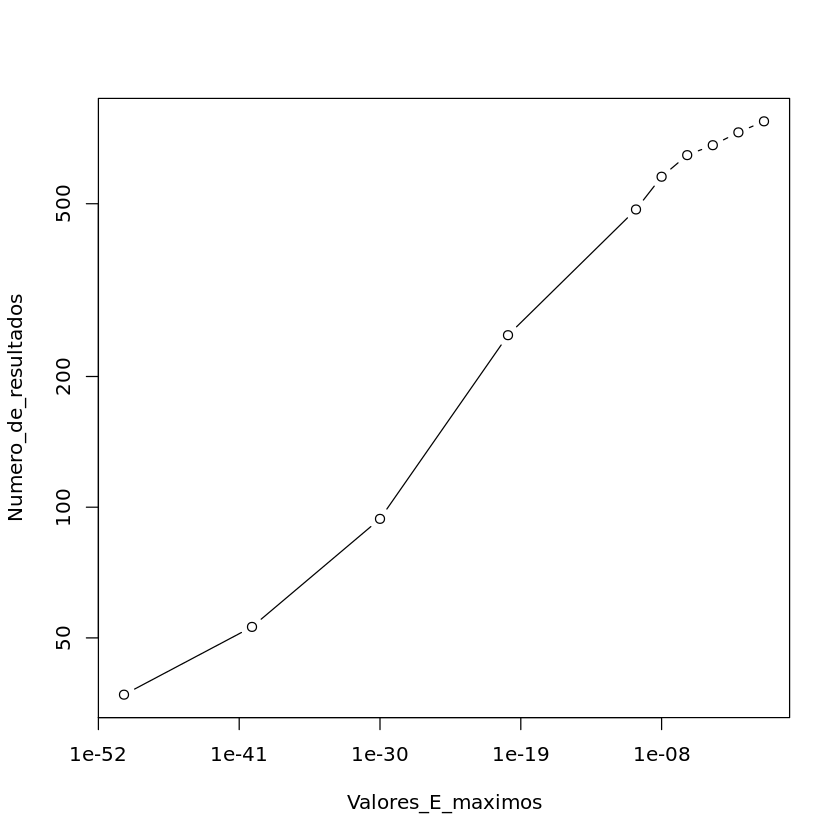

In [ ]:
# En la representación gráfica, podemos usar escala logarítmica solamente
# en un eje ("log='x'"), en los dos, o en ninguno.
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

A continuación se examina la relación entre la longitud del alineamiento y el e-valor de los resultados guardados en la última tabla, la número 10, en la que he usado un e-valor de 1 y que contiene un mayor número de resultados.
Posteriormente, se examina la relación entre la longitud del alineamiento y el e-valor de los resultados guardados en la primera tabla, la número 1, en la que el valor de E es de 1.0e-50, por lo que los resultados están muy restringidos.

In [ ]:
#Para obtener las longitudes de los anineamientos de la tabla número 10,
# aquella que contiene un mayor número de resultados, ejecuto el siguiente comando:
Lista_de_Tablas[[10]]$length

Lista_de_Tablas[[1]]$length

[1] 460 460 460 460 460 460 520 520 518 520 509 520 509 491 512 491 491 516
 [19] 448 444 439 444 444 439 439 452 439 432 459 472 215 109 211 109 245  85
 [37] 208 164 456 488 464 408 461 455 453 430 469 460 439 436 448 455 444 448
 [55] 445 448 448 445 414 415 410 414 414 436 394 394 412 414 430 404 437 394
 [73] 394 439 437 415 401 448 433 412 394 428 419 430 430 437 430 443 434 419
 [91] 408 445 447 442 429 429 441 455 478 440 440 442 183 183 412 393 393 183
[109] 426 422 422 439 439 223 187 387 433 402 412 422 422 410 421 410 439 438
[127] 234 107 420 236 236 214 110 205  93 405 256 127 419 224  96 411 198 107
[145] 193  97 242 127 228 183 419 221  96 364 238 124 185 108 194 107 391 401
[163] 227  93 230  96 213  79 403 259 127 197  95 342 223 259 127 413 251 127
[181] 274 126 225  90 247  96 244  96 207  90 231  96 235  98 234 130 228  87
[199] 411 396 215 127 259 200  91 206  87 248 127 259 129 395 229  90 192  93
[217] 194  93 234 127 220 118 208  91 398 203  82 233  96 399 392 226  82 234
[235] 127 200 105 225  88 223  99 223  99 227 121 189 162 186 123 200  92 192
[253]  78 230  91 232  86 200  92 197  99 184  75 216 102 388 190 127 221  77
[271] 192  99 249 107 221  77 233 109 203 111 211 194 123 216 115 227  86 257
[289]  91 403 148 227  86 232 111 220 111 220 115 220 111 219 111 190  92 226
[307]  94 228  91 229  99 180  84 215  91 241 111 214  77 219 111 201 113 252
[325] 106 212  86 253  90 247 110 200 105 251 126 180  93 205 111 180  93 205
[343] 111 246 111 180  93 200 105 224 142 190 101 226 105 251 126 256  95 180
[361]  93 231 128 200 115 225  75 191  90 398 188  75 235  96 398 216 115 195
[379]  91 234 104 224 151 132 293 193  96 233  91 165 193  96 193  96 193  96
[397] 193  97 221  96 221  96 221  96 184  80 210 117 233  91 111 104 182  96
[415] 182  96 189  72 197  76 226 103 227 103 398 216  75 184  75 203 124 194
[433] 117 228 127 197 149 401 226 103 214 184  75 200  94 208 151 207  75 214
[451]  75 258  75 234  97 239 129 452 239 102 213 186 165  96 226 220  75 215
[469] 408 220 108 217  75 185 212  75 159  72 153 218 153 150 208 207 124 435
[487] 218 155 104 189  79 208 203 206 124 159 127 220 108 214 440 220 193 143
[505] 215 106 420 183 169 104 218 103 193 114 218 155 104 436 220 186 213 104
[523] 419 190 212 181  73 194 208 212  74 222  88 138  99 222  94 146  89 212
[541]  81 211  81 225 109 217  88 218 108 416 217 110 231 224  86 226  75 223
[559]  95 220 108 220  90 221  58 224  86 214  94 137 217  74 206  92 223  86
[577] 152 104 142 226  75 180  81 219 122 138 228 156 224  88 137 209 156  72
[595] 225 109 183 220  90 226  58 226  58 220 158 197  88 228  58 203  58 217
[613]  74 235  74 226  58 137 155 124 155 124 224  88 222  94 137 220  93 212
[631]  74 166 137 221 107 197 104 196 105 197  88 202  58 104 208 196  96 220
[649]  90 217  88 224  93 143 176 437 160 166  78 135 103 135  94 191  74 212
[667] 159 226 196  81 192 124 181 175 150  75 202  88 208 123  96 213 185 224
[685] 158 221 181  83 201 273 104 210  70 172  81 172 193  97 202  79  98 202
[703]  79 172 198 108 143 292 389 205  75 202  79 202  79 212 436 208 200 260
[721] 196  79 184 194  87 205  75 212  97 197  98 158 196 100 127 117 163 233
[739] 115 193  86 127 191  97 185 209 139 116 200 145  78 195 101 126 115 127
[757] 103 210  86 126 115 149  78 211 101 210 210  86 151 198 193  84 139  79

[1] 460 460 460 460 460 460 520 520 518 520 509 520 509 491 512 491 491 516 448
[20] 444 439 444 444 439 439 452 439 432 459 472 215 211 245 208 408 455 436

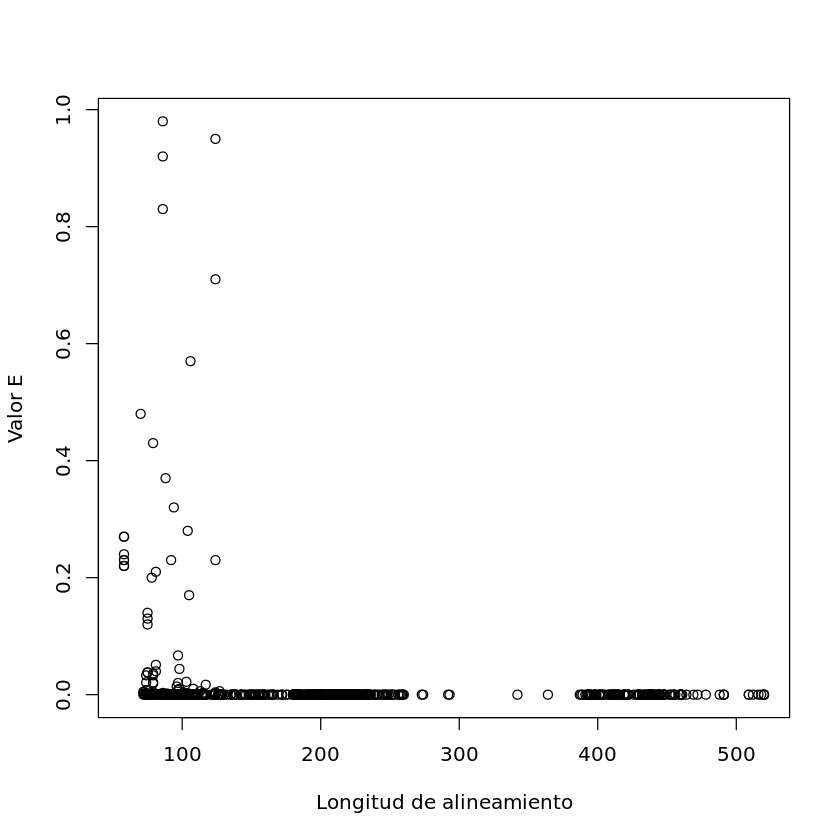

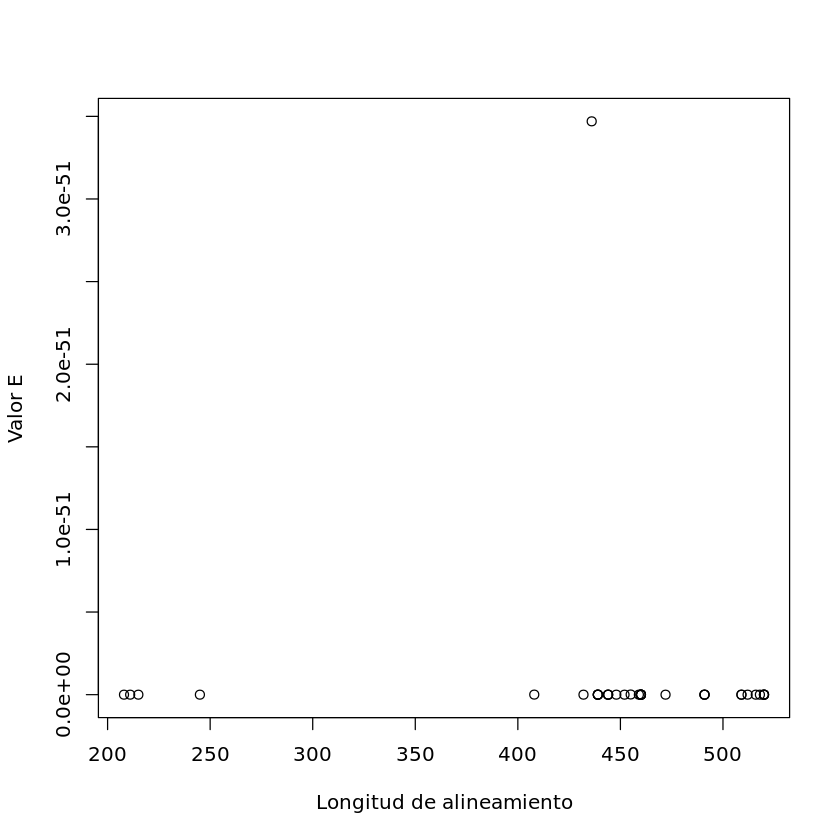

In [ ]:
#Podemos realizar una representación de puntos que permita observar la mayoría de las
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

plot(Lista_de_Tablas[[1]]$length, Lista_de_Tablas[[1]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

Aunque la proteína CHRM1 es de 460 aminoácidos,al igual que existen alineamientos de una longitud mayor (como se ha comentado anteriormente); existen alineamientos de longitud menor a 300. Esto indica que existen muchas proteínas en la base de datos que presentan homología parcial con CHRM1. Es decir, que muchos de estos resultados corresponden a proteínas que solo se parecen a CHRM1 en un fragmento concreto; probablemente un dominio de función conservada. Cabe preguntar qué posiciones de CHRM1 son esas que participan en los alineamientos parciales.

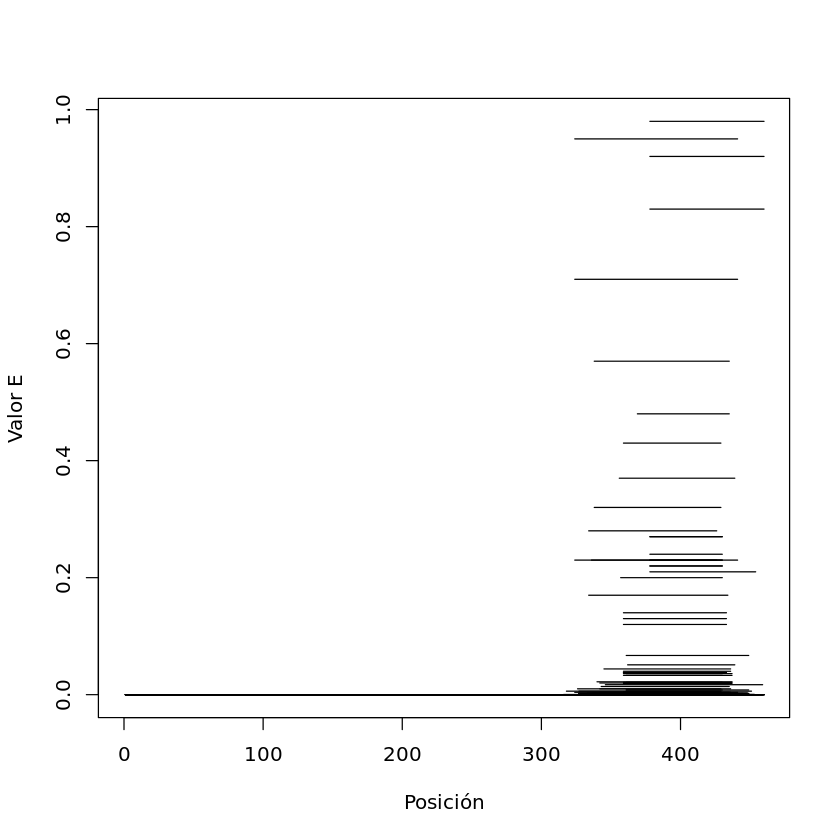

In [ ]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

# La función segments() añade segmentos a un gráfico previo. Por eso, represento
# antes un gráfico con los rangos adecuados, pero vacío (type='n'). Para determinar
# el rango del eje horizontal, determino primero el valor máximo de "qend".
AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

Esta gráfica muestra que la homología encontrada con  el e-valor máximo probado no está distribuída aleatoriamente a lo largo de la secuencia de CHRM1, sino que se concentra en la posición 400, aproximadamente.


Por último, se explora la distribución taxonómica de las secuencias encontradas. La columna `sblastname` ofrece una clasificación interpretable de las secuencias. Una posibilidad es contar en cada tabla las secuencias encontradas de cada grupo taxonómico. Para ello, se aplica la función `table()` a esa columna de cada tabla en `Lista_de_Tablas`:

In [ ]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
                 15                  19 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

El resultado del código anterior es una lista de recuentos de los diferentes grupos taxonómicos presentes en cada tabla de resultados de blastp. Es curioso como, aunque los receptores muscarínicos forman uno de los principales tipos de receptores de acetilcolina en las neuronas de vertebrados, aparece en el blastp más estricto, el mismo número de resultados de crustáceos, moscas, anuros, y nemátodos. Resulta interesante porque los anuros son vertebrados, pero el resto de los mencionados, son invertebrados, y en todos los casos aparecen con la misma frecuencia.


Se observa, por ejemplo, que en los resultados del quinto blastp (umbral de e-valor de $10^{-10}$) empiezan a aprecer secuencias homólogas a CHRM1 procedentes de virus. Aún así, en todos los casos, el número de primates y roedores destaca frente al resto.

Puesto que CHRM1 es un receptor de acetilcolina en las neuronas de vertebrados, cabe suponer que solo las proteínas homólogas con e-valores menores y con alineamientos más completos conservan una misma función en la recepción de acetilcolina. Para ver la relación entre la longitud del alineamiento y la distribución taxonómica, a continuación se repite el recuento de grupos taxonómicos, teniendo en cuenta solamente las secuencias con un alineamiento de, al menos, 400 aminoácidos:

In [ ]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 400
       table(x[filtro, 'sblastname'])})

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   1                   0 
           primates             rodents 
                 15                  15 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   1                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

## Discusión
Utilizando la secuencia de la proteína CHRM1 humana como consulta (*query*) en búsquedas de blastp, encontramos proteínas homólogas en aves, peces, moscas, ranas, saltamontes, moscas, e incluso en virus. Sabiendo que CHRM1 es un receptor humano, puede sorprender que existan homólogas en tal diversidad. La distribución de los alineamientos a lo largo de la secuencia de CHRM1 (de 500 aminoácidos) muestra que gran parte de la homología encontrada se limita a una región de poco más de 100 aminoácidos, concentrada en la posición 400, aproximadamente. Esta región consituye un dominio conservado.


Una búsqueda manual de la secuencia en la base de datos Pfam (Mistry *et al*, 2021) muestra que se trata de la família 7TM_1 (PF00001), una família de receptores similares a la rodopsina. Comprenden el grupo más grande de receptores acoplados a proteínas G. Entre las funciones, cabe destacar la participación en procesos autocrinos, paracrinos y endocrinos.


Sin embargo, cabe señalar que algunas de las secuencias homólogas a CHRM1 presentes en organismos no mamíferos extienden su homología a lo largo de más de 500 aminoácidos. Un ejemplo es la proteína [P49578.1](https://www.ncbi.nlm.nih.gov/protein/P49578.1) de pollo, un supuesto receptor muscarínico de acetilcolina M3 de 639 aminoácidos cuyo alineamiento con CHRM1 abarca 516 posiciones.


## Referencias
Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira
Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular
Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, doi:10.1093/molbev/msaa252.
